In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

In [8]:
# Load the Iris dataset
iris_data = load_iris()
iris_features = iris_data.data
iris_target = iris_data.target

# Load the Boston Housing dataset using fetch_openml
boston_data = fetch_openml(data_id=506, as_frame=True)
boston_features = boston_data.data
boston_target = boston_data.target
boston_features = boston_features.rename(columns=lambda x: x.replace(' ', '_'))

c:\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [9]:
# Preprocessing for Boston Housing dataset
numeric_features = boston_features.select_dtypes(include=['float64'])

# Handle missing values in numeric features
imputer = SimpleImputer(strategy='mean')
numeric_features_imputed = imputer.fit_transform(numeric_features)
numeric_features_df = pd.DataFrame(numeric_features_imputed, columns=numeric_features.columns)

In [11]:
# Normalization using StandardScaler
scaler = StandardScaler()
numeric_features_scaled = scaler.fit_transform(numeric_features_df)
numeric_features_scaled_df = pd.DataFrame(numeric_features_scaled, columns=numeric_features.columns)

# Combine processed numeric features with non-numeric features (if any)
processed_boston_features = numeric_features_scaled_df

In [13]:
# Apply feature selection to the Iris dataset
selector_iris = SelectKBest(score_func=f_classif, k=2)  # Select the top 2 features
X_iris_selected = selector_iris.fit_transform(iris_features, iris_target)

# Apply feature selection to the Boston Housing dataset
selector_boston = SelectKBest(score_func=f_regression, k='all')  # Select all available features
X_boston_selected = selector_boston.fit_transform(processed_boston_features, boston_target)

In [14]:
# Split for Iris dataset
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris_selected, iris_target, test_size=0.3, random_state=42)

# Split for Boston Housing dataset
X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(X_boston_selected, boston_target, test_size=0.3, random_state=42)

In [20]:
# Classification models for Iris dataset
classification_models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

classification_results = []

for name, model in classification_models.items():
    model.fit(X_train_iris, y_train_iris)
    y_pred = model.predict(X_test_iris)
    accuracy = accuracy_score(y_test_iris, y_pred)
    classification_results.append({"Model": name, "Accuracy": accuracy})

classification_df = pd.DataFrame(classification_results)

In [21]:
# Regression models for Boston Housing dataset
regression_models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor()
}

regression_results = []

for name, model in regression_models.items():
    model.fit(X_train_boston, y_train_boston)
    y_pred = model.predict(X_test_boston)
    mse = mean_squared_error(y_test_boston, y_pred)
    regression_results.append({"Model": name, "Mean Squared Error": mse})

regression_df = pd.DataFrame(regression_results)

Classification Model Comparison:Iris Dataset
                 Model  Accuracy
0  Logistic Regression       1.0
1        Random Forest       1.0

Regression Model Comparison:Boston Dataset
               Model  Mean Squared Error
0  Linear Regression            0.969098
1      Decision Tree            0.965405


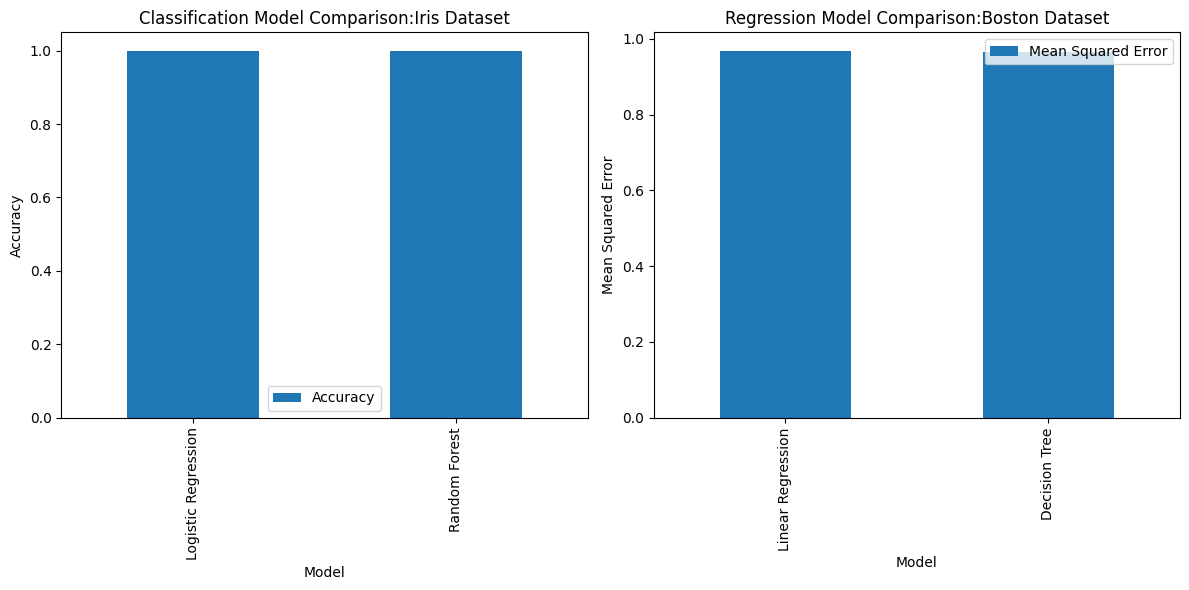

In [24]:
# Print comparison tables
print("Classification Model Comparison:Iris Dataset")
print(classification_df)

print("\nRegression Model Comparison:Boston Dataset")
print(regression_df)

# Create visualization of comparison tables
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Classification comparison
classification_df.plot(kind='bar', x='Model', y='Accuracy', ax=axes[0])
axes[0].set_title('Classification Model Comparison:Iris Dataset')
axes[0].set_ylabel('Accuracy')

# Regression comparison
regression_df.plot(kind='bar', x='Model', y='Mean Squared Error', ax=axes[1])
axes[1].set_title('Regression Model Comparison:Boston Dataset')
axes[1].set_ylabel('Mean Squared Error')

plt.tight_layout()
plt.show()

#Findings and Insights:

##Iris Dataset - Classification:

###Model Performance:

-Both Logistic Regression and Random Forest achieved a perfect accuracy of 1.0 on the Iris dataset.

-This suggests that both models accurately classified the Iris species based on the selected features.

###Number of Selected Features:

-The number of selected features was 2.

-Having only 2 features indicates that these features provide sufficient information for accurate classification.

###Insights:

-Both Logistic Regression and Random Forest excelled in classifying the Iris dataset.

##Boston Housing Dataset - Regression:

###Model Performance:

-Both Linear Regression and Decision Tree achieved similar mean squared error (MSE) values: around 0.965 to 0.969.

-This indicates that both models provided comparable predictions of housing prices.

###Number of Selected Features:

-All available features were used for modeling.

-This implies that multiple features collectively play a role in predicting housing prices.

###Insights:

-Both Linear Regression and Decision Tree models showed similar predictive performance.

-Selection of models could be influenced by considerations like complexity and interpretability.

#Conclusion:

-For the Iris dataset, both Logistic Regression and Random Forest exhibited outstanding performance, suggesting the quality of features and models.

-For the Boston Housing dataset, both Linear Regression and Decision Tree models offered similar predictive capabilities, with all available features contributing to predictions.

-The decision on model selection should align with factors like model complexity, interpretability, and dataset characteristics. Optimal model choice varies depending on problem context and goals.

-This analysis demonstrates the effectiveness of different models for different datasets, emphasizing the significance of thoughtful model selection and understanding the interplay between features and targets.